# Welcome to the Sendy Logistics Challenge - Team 9 JHB

In [1]:
# import the pandas module
import pandas as pd
# import the seaborn module
import seaborn as sns
# import the matplotlib module
import matplotlib.pyplot as plt
# import the numpy module
import numpy as np

## Train Dataset
### Dataset used to train prediction model

In [2]:
# Train Dataset
train_df = pd.read_csv('data/Train.csv')
train_df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [3]:
df = train_df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   21201 non-null  object 
 1   User Id                                    21201 non-null  object 
 2   Vehicle Type                               21201 non-null  object 
 3   Platform Type                              21201 non-null  int64  
 4   Personal or Business                       21201 non-null  object 
 5   Placement - Day of Month                   21201 non-null  int64  
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 7   Placement - Time                           21201 non-null  object 
 8   Confirmation - Day of Month                21201 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 10  Confirmation - Time   

## Summary Statistics

In [4]:
df.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival'],
      dtype='object')

In [5]:
columns = ['Order_No', 'User_Id', 'Vehicle_Type', 'Platform_Type',
       'Personal_or_Business', 'Placement_Day_of_Month',
       'Placement_Weekday', 'Placement_Time',
       'Confirmation_Day', 'Confirmation_Weekday',
       'Confirmation_Time', 'Arrival_at_Pickup_Day',
       'Arrival_at_Pickup_Weekday', 'Arrival_at_Pickup_Time',
       'Pickup_Day', 'Pickup_Weekday', 'Pickup_Time',
       'Arrival_at_Destination_Day',
       'Arrival_at_Destination_Weekday',
       'Arrival_at_Destination_Time', 'Distance', 'Temperature',
       'Precipitation', 'Pickup_Lat', 'Pickup_Long',
       'Destination_Lat', 'Destination_Long', 'Rider_Id',
       'Time_from_Pickup_to_Arrival']
df.columns = [name.lower() for name in columns]

In [6]:
summary = df.describe()
summary

,platform_type,placement_day_of_month,placement_weekday,confirmation_day,confirmation_weekday,arrival_at_pickup_day,arrival_at_pickup_weekday,pickup_day,pickup_weekday,arrival_at_destination_day,arrival_at_destination_weekday,distance,temperature,precipitation,pickup_lat,pickup_long,destination_lat,destination_long,time_from_pickup_to_arrival
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,16835.000000,552.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,9.506533,23.258889,7.905797,-1.281470,36.811264,-1.282581,36.811220,1556.920947
std,0.625178,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,5.668963,3.615768,17.089971,0.030507,0.037473,0.034824,0.044721,987.270788
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,0.100000,-1.438302,36.653621,-1.430298,36.606594,1.000000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,20.600000,1.075000,-1.300921,36.784605,-1.301201,36.785661,882.000000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.500000,2.900000,-1.279395,36.807040,-1.284382,36.808002,1369.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,26.000000,4.900000,-1.257147,36.829741,-1.261177,36.829477,2040.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,99.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000


In [7]:
df.head()

,order_no,user_id,vehicle_type,platform_type,personal_or_business,placement_day_of_month,placement_weekday,placement_time,confirmation_day,confirmation_weekday,...,arrival_at_destination_time,distance,temperature,precipitation,pickup_lat,pickup_long,destination_lat,destination_long,rider_id,time_from_pickup_to_arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


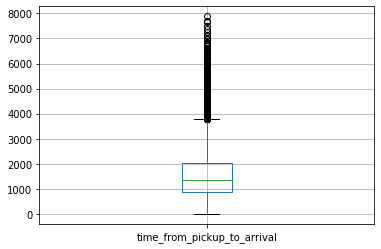

In [8]:
df.boxplot(column = 'time_from_pickup_to_arrival')

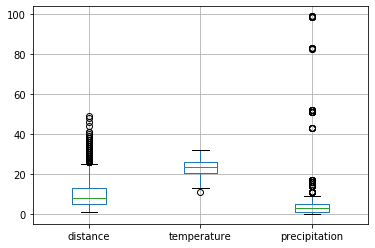

In [9]:
df.boxplot(column = ['distance','temperature','precipitation'])

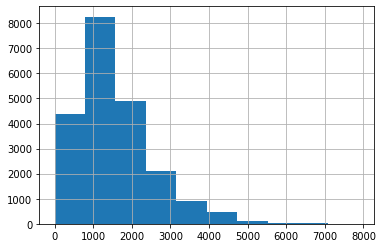

In [10]:
df.time_from_pickup_to_arrival.hist()

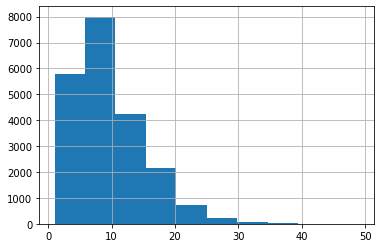

In [11]:
df.distance.hist()

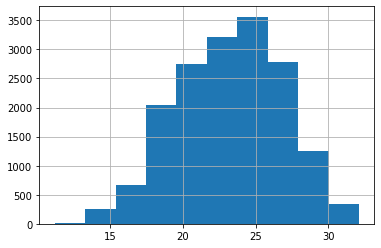

In [12]:
df.temperature.hist()

In [13]:
df.corr()

,platform_type,placement_day_of_month,placement_weekday,confirmation_day,confirmation_weekday,arrival_at_pickup_day,arrival_at_pickup_weekday,pickup_day,pickup_weekday,arrival_at_destination_day,arrival_at_destination_weekday,distance,temperature,precipitation,pickup_lat,pickup_long,destination_lat,destination_long,time_from_pickup_to_arrival
platform_type,1.000000,0.012764,-0.058038,0.012770,-0.058005,0.012770,-0.058005,0.012770,-0.058005,0.012770,-0.058005,0.005528,0.225060,-0.055948,-0.002742,0.021327,0.006319,0.043924,-0.003827
placement_day_of_month,0.012764,1.000000,0.026148,0.999998,0.026122,0.999998,0.026122,0.999998,0.026122,0.999998,0.026122,-0.007585,0.013097,-0.204143,-0.004929,-0.005453,0.007541,0.002077,-0.014710
placement_weekday,-0.058038,0.026148,1.000000,0.026132,0.999952,0.026132,0.999952,0.026132,0.999952,0.026132,0.999952,0.003582,0.031064,-0.050592,-0.000918,0.011008,-0.004299,-0.000875,0.009693
confirmation_day,0.012770,0.999998,0.026132,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,-0.007587,0.013099,-0.204143,-0.004923,-0.005448,0.007550,0.002073,-0.014701
confirmation_weekday,-0.058005,0.026122,0.999952,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.003574,0.031074,-0.050592,-0.000883,0.011036,-0.004251,-0.000900,0.009744
arrival_at_pickup_day,0.012770,0.999998,0.026132,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,-0.007587,0.013099,-0.204143,-0.004923,-0.005448,0.007550,0.002073,-0.014701
arrival_at_pickup_weekday,-0.058005,0.026122,0.999952,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.003574,0.031074,-0.050592,-0.000883,0.011036,-0.004251,-0.000900,0.009744
pickup_day,0.012770,0.999998,0.026132,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,-0.007587,0.013099,-0.204143,-0.004923,-0.005448,0.007550,0.002073,-0.014701
pickup_weekday,-0.058005,0.026122,0.999952,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.003574,0.031074,-0.050592,-0.000883,0.011036,-0.004251,-0.000900,0.009744
arrival_at_destination_day,0.012770,0.999998,0.026132,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,-0.007587,0.013099,-0.204143,-0.004923,-0.005448,0.007550,0.002073,-0.014701


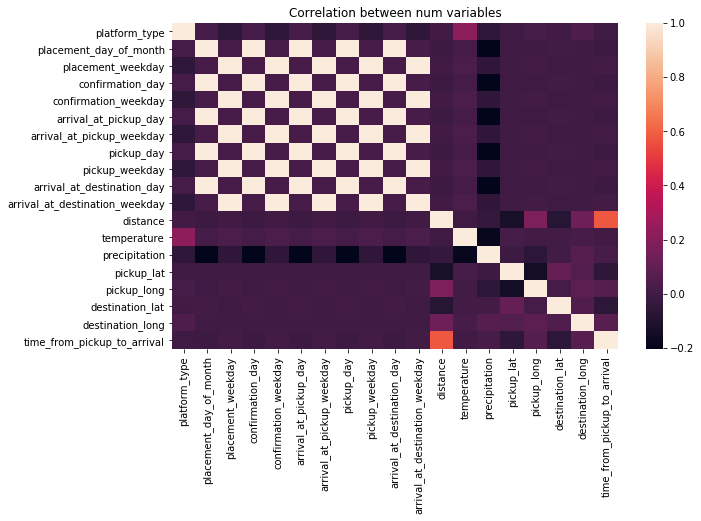

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr())
plt.title('Correlation between num variables')
plt.show()

In [15]:
pd.pivot_table(df, index=['distance','temperature'], values ='time_from_pickup_to_arrival')

time_from_pickup_to_arrival
distance temperature                             
1        14.6                               416.0
         15.6                               362.0
         15.9                                 5.0
         16.1                               415.0
         16.9                               502.0
...                                           ...
41       18.1                              3578.0
         21.0                              3867.0
44       25.2                              4233.0
46       19.6                              4797.0
48       27.8                              5530.0

[3564 rows x 1 columns]

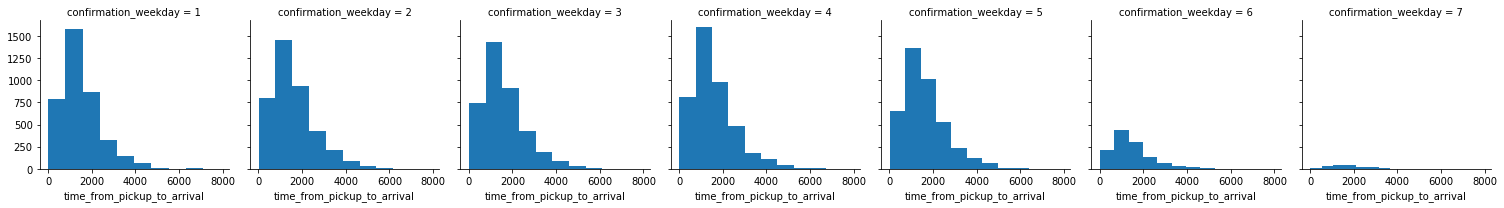

In [16]:
g = sns.FacetGrid(df, col="confirmation_weekday")
g.map(plt.hist, "time_from_pickup_to_arrival");
plt.show()

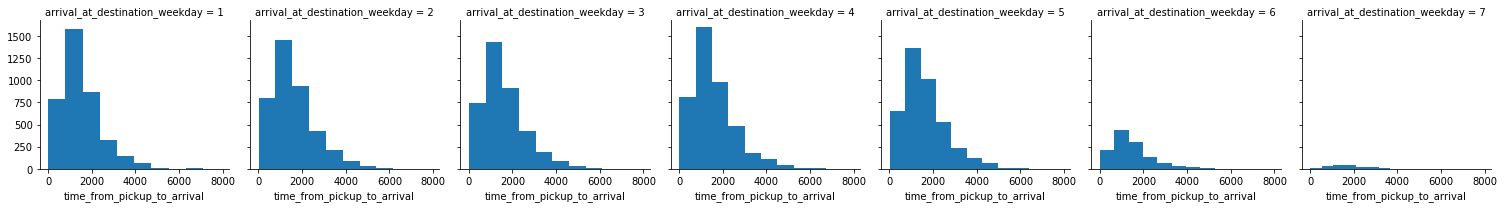

In [17]:
d = sns.FacetGrid(df, col="arrival_at_destination_weekday")
d.map(plt.hist, "time_from_pickup_to_arrival");
plt.show()

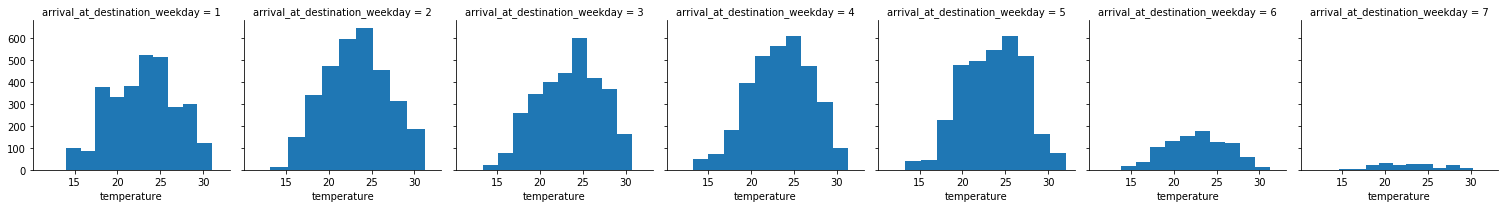

In [18]:
d = sns.FacetGrid(df, col="arrival_at_destination_weekday")
d.map(plt.hist, "temperature");
plt.show()

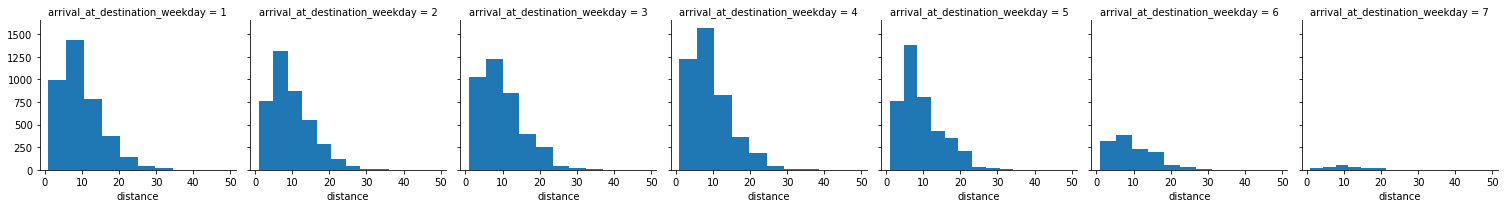

In [19]:
d = sns.FacetGrid(df, col="arrival_at_destination_weekday")
d.map(plt.hist, "distance");
plt.show()

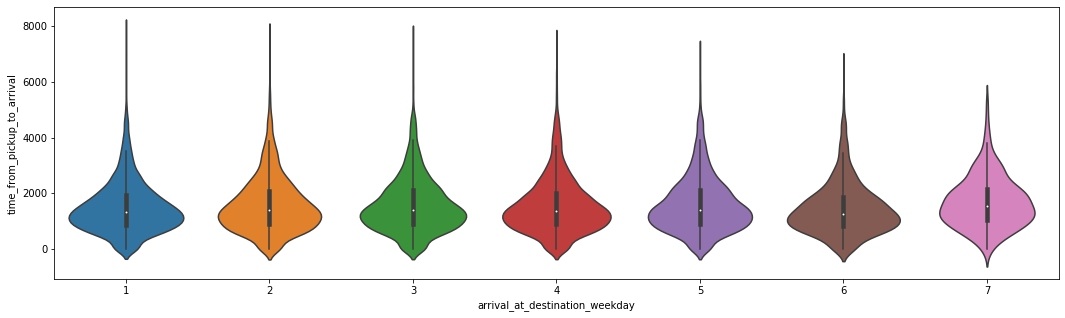

In [20]:
plt.figure(figsize=(18,5))
sns.violinplot(data=df[['arrival_at_destination_weekday','time_from_pickup_to_arrival']], x='arrival_at_destination_weekday', y='time_from_pickup_to_arrival')
plt.show()

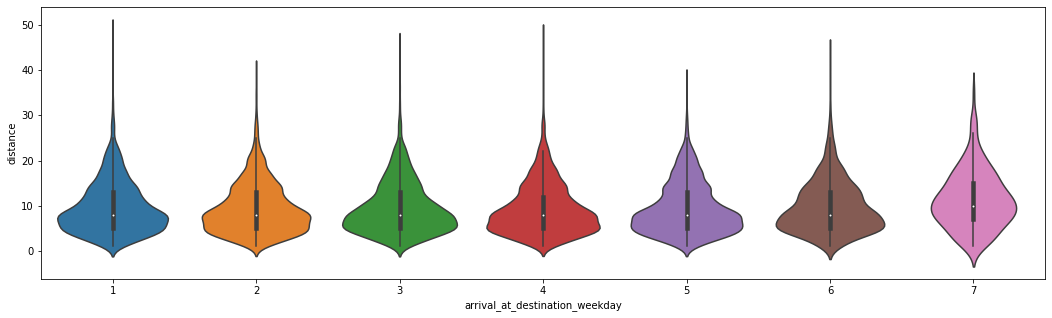

In [21]:
plt.figure(figsize=(18,5))
sns.violinplot(data=df[['arrival_at_destination_weekday','distance']], x='arrival_at_destination_weekday', y='distance')
plt.show()

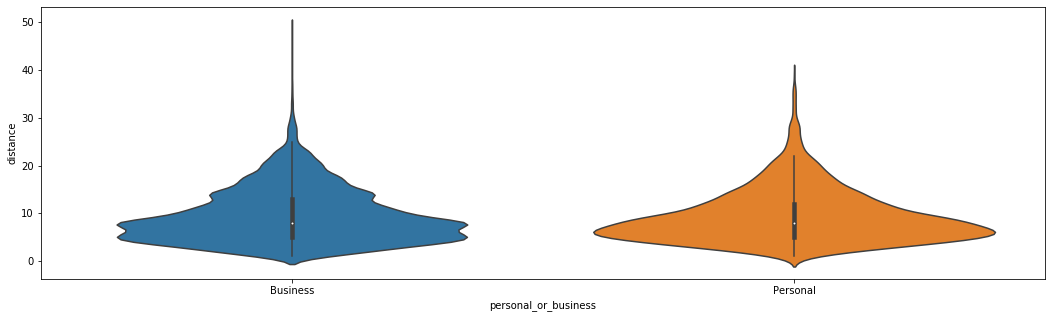

In [22]:
plt.figure(figsize=(18,5))
sns.violinplot(data=df[['personal_or_business','distance']], x='personal_or_business', y='distance')
plt.show()

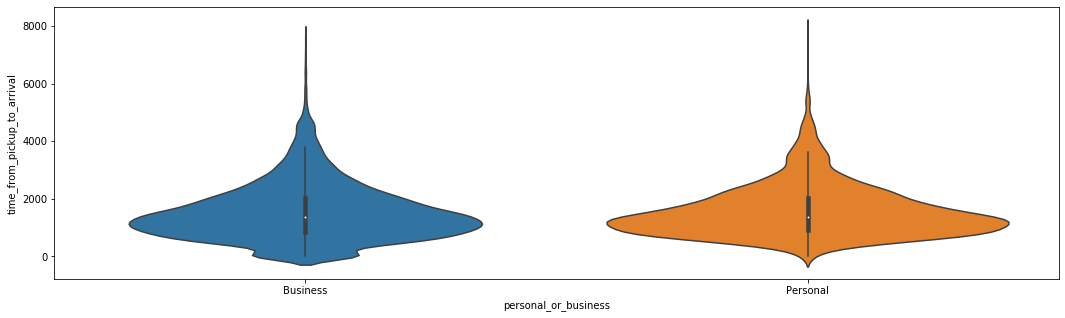

In [23]:
plt.figure(figsize=(18,5))
sns.violinplot(data=df[['personal_or_business','time_from_pickup_to_arrival']], x='personal_or_business', y='time_from_pickup_to_arrival')
plt.show()

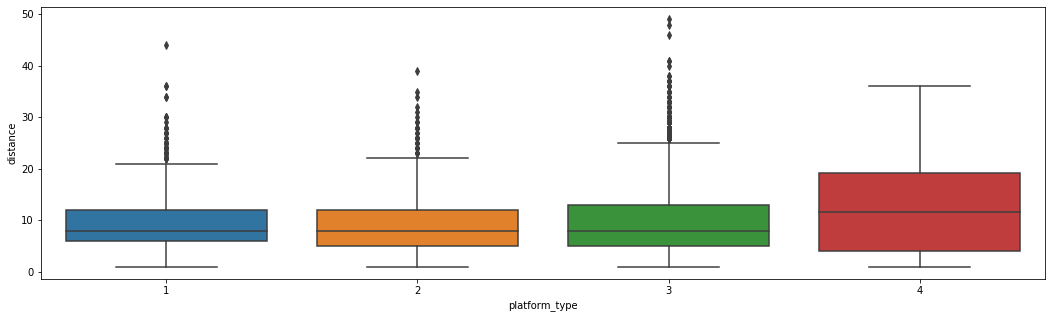

In [25]:
plt.figure(figsize=(18,5))
sns.boxplot(data=df[['platform_type','distance']], x='platform_type', y='distance')
plt.show()

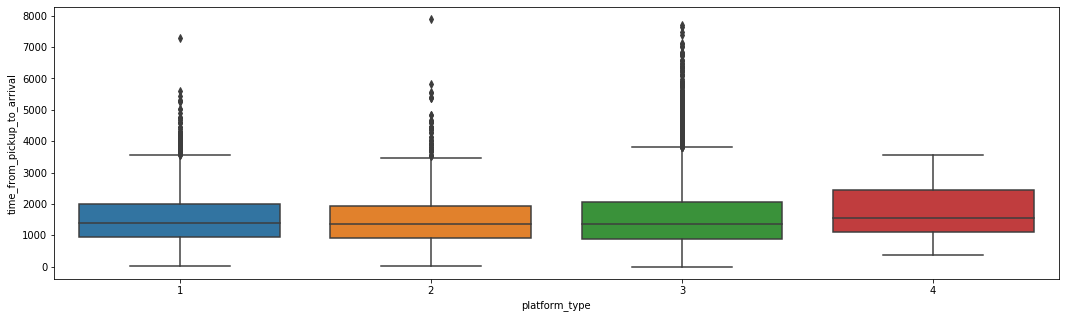

In [26]:
plt.figure(figsize=(18,5))
sns.boxplot(data=df[['platform_type','time_from_pickup_to_arrival']], x='platform_type', y='time_from_pickup_to_arrival')
plt.show()

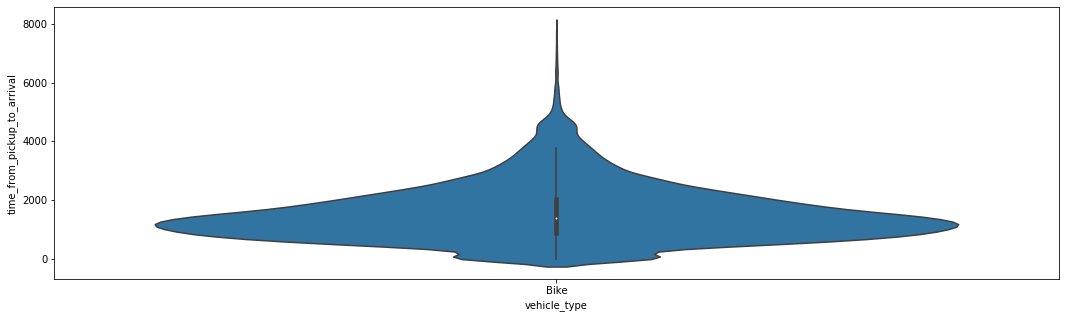

In [27]:
plt.figure(figsize=(18,5))
sns.violinplot(data=df[['vehicle_type','time_from_pickup_to_arrival']], x='vehicle_type', y='time_from_pickup_to_arrival')
plt.show()

In [28]:
# Test Dataset
test_df = pd.read_csv('data/Test.csv')
test_df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,...,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,...,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


## Riders Dataset

In [29]:
# Riders Dataset
riders_df = pd.read_csv('data/Riders.csv')
riders_df.head()

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156


In [30]:
columns= list(riders_df.columns)
columns = [x.lower() for x in columns]
columns[0] = 'rider_id'
riders_df.columns = columns
riders_df.head()

,rider_id,no_of_orders,age,average_rating,no_of_ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156


In [31]:
riders_df['rider_id'] = riders_df['rider_id'].apply(lambda x: x.split('_')[-1])
riders_df.head()

,rider_id,no_of_orders,age,average_rating,no_of_ratings
0,396,2946,2298,14.0,1159
1,479,360,951,13.5,176
2,648,1746,821,14.3,466
3,753,314,980,12.5,75
4,335,536,1113,13.7,156


## Variable Definitions for Datasets

In [32]:
# Variable Definitions Dataset
var_def_df = pd.read_csv('data/VariableDefinitions.csv')
var_def_df

,Order No,Unique number identifying the order
0,User Id,Unique number identifying the customer on a pl...
1,Vehicle Type,"For this competition limited to bikes, however..."
2,Platform Type,"Platform used to place the order, there are 4 ..."
3,Personal or Business,Customer type
4,Placement - Day of Month,Placement - Day of Month i.e 1-31
5,Placement - Weekday (Mo = 1),Placement - Weekday (Monday = 1)
6,Placement - Time,Placement - Time - Time of day the order was p...
7,Confirmation - Day of Month,Confirmation - Day of Month i.e 1-31
8,Confirmation - Weekday (Mo = 1),Confirmation - Weekday (Monday = 1)
9,Confirmation - Time,Confirmation - Time - Time of day the order wa...


# Sample submission

In [33]:
# Sample Submission
sub_sample_df = pd.read_csv('data/SampleSubmission.csv')
sub_sample_df.head()

,Order_No,Time from Pickup to Arrival
0,Order_No_19248,567.0
1,Order_No_12736,4903.0
2,Order_No_768,5649.0
3,Order_No_15332,NaN
4,Order_No_21373,NaN
